### Measuring the Central Tendency: Mean, Median, and Mode

In [1]:
import pandas as pd

X = {'X':(30, 36, 47, 50, 52, 52, 56, 60, 63, 70, 70, 110)}
data = pd.DataFrame(X)
data

,X
0,30
1,36
2,47
3,50
4,52
5,52
6,56
7,60
8,63
9,70


In [2]:
def mean(X):
    X = list(X)
    mean = sum(X)/len(X)
    return mean

In [3]:
data.apply(mean)

X    58.0
dtype: float64

In [4]:
def trimmed_mean(X, trim_ratio):
    X = sorted(X)
    X = list(X)
    trim_num = int(len(X)*trim_ratio)
    trimmed_X = X[trim_num:len(X)-trim_num]
    trimmed_mean = sum(trimmed_X)/len(trimmed_X)
    return trimmed_mean

In [5]:
trim_ratio = 0.2
trimmed_means = data.apply(lambda col: trimmed_mean(col, trim_ratio))
print(trimmed_means)

X    56.25
dtype: float64


In [6]:
data = pd.DataFrame({
    'data_points': (30, 36, 47, 50, 52, 52, 56, 60, 63, 70, 70, 110),
    'weights':(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)
})
data.head()

,data_points,weights
0,30,1
1,36,2
2,47,3
3,50,4
4,52,5


In [7]:
def weighted_mean(values, weights):
    weighted_mean = sum(values*weights)/sum(weights)
    return weighted_mean

In [8]:
weighted_mean(data['data_points'], data['weights'])

67.23076923076923

In [9]:
data = pd.DataFrame({
    'X':(30, 36, 47, 50, 52, 52, 56, 60, 63, 70, 70, 110)
})

In [10]:
def median(X):
    X = sorted(X)
    n = len(X)
    if n % 2 == 0:
        mid_index = n // 2
        median = (X[mid_index - 1] + X[mid_index]) / 2
    else:
        mid_index = n // 2
        median = X[mid_index]
    return median

In [11]:
data.apply(median)

X    54.0
dtype: float64

In [12]:
def mode(X):
    freq = X.value_counts()
    max_freq = freq.max()
    modes = freq[freq == max_freq].index.tolist()
    return modes

In [13]:
data.apply(mode)

,X
0,52
1,70


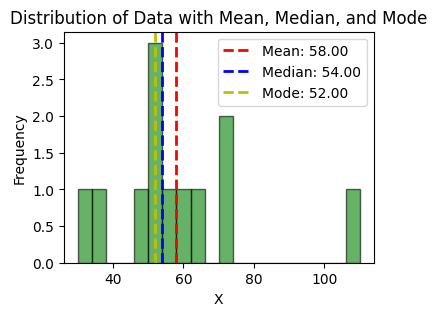

In [14]:
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'X': [30, 36, 47, 50, 52, 52, 56, 60, 63, 70, 70, 110]
})

mean_value = data['X'].mean()
median_value = data['X'].median()
mode_values = data['X'].mode().tolist()[0]  # mode() returns a Series, convert to list

# Plot the histogram
plt.figure(figsize=(4, 3))
plt.hist(data['X'], bins=20, alpha=0.6, color='g', edgecolor='black')

# Plot vertical lines for mean, median, and mode(s)
plt.axvline(mean_value, color='r', linestyle='dashed', linewidth=2, label=f"Mean: {mean_value:.2f}")
plt.axvline(median_value, color='b', linestyle='dashed', linewidth=2, label=f"Median: {median_value:.2f}")
plt.axvline(mode_values, color='y', linestyle='dashed', linewidth=2, label=f"Mode: {mode_values:.2f}")

plt.legend()
plt.title('Distribution of Data with Mean, Median, and Mode')
plt.xlabel('X')
plt.ylabel('Frequency')
plt.show()


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

def plot_distribution(data, title):
    mean = data.mean()
    median = data.median()
    mode = data.mode()[0]  # mode() returns a Series, take the first value
    
    plt.figure(figsize=(5, 3))
    plt.hist(data, bins=30, alpha=0.6, color='g', edgecolor='black')
    plt.axvline(mean, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean:.2f}')
    plt.axvline(median, color='b', linestyle='dashed', linewidth=2, label=f'Median: {median:.2f}')
    plt.axvline(mode, color='y', linestyle='dashed', linewidth=2, label=f'Mode: {mode:.2f}')
    plt.legend()
    plt.title(title)
    plt.show()

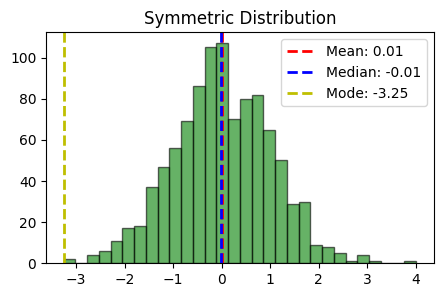

In [16]:
# Symmetric data (Normal distribution)
symmetric_data = np.random.normal(loc=0, scale=1, size=1000)
symmetric_series = pd.Series(symmetric_data)
plot_distribution(symmetric_series, 'Symmetric Distribution')

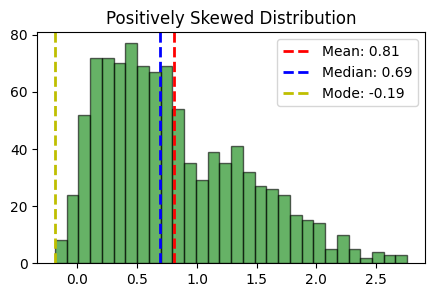

In [17]:
# Positively skewed data
positive_skew_data = skewnorm.rvs(a=10, loc=0, scale=1, size=1000)
positive_skew_series = pd.Series(positive_skew_data)
plot_distribution(positive_skew_series, 'Positively Skewed Distribution')

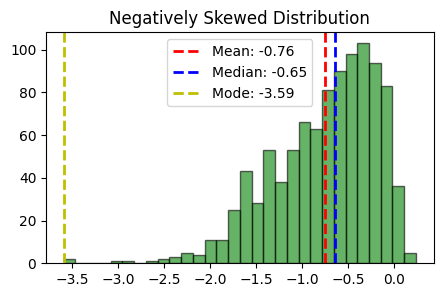

In [18]:
# Negatively skewed data
negative_skew_data = skewnorm.rvs(a=-10, loc=0, scale=1, size=1000)
negative_skew_series = pd.Series(negative_skew_data)
plot_distribution(negative_skew_series, 'Negatively Skewed Distribution')

### Measuring the Dispersion of Data: Range, Quartiles, Variance, Standard Deviation, and Interquartile Range
### Range, Quartiles, and Interquartile Range

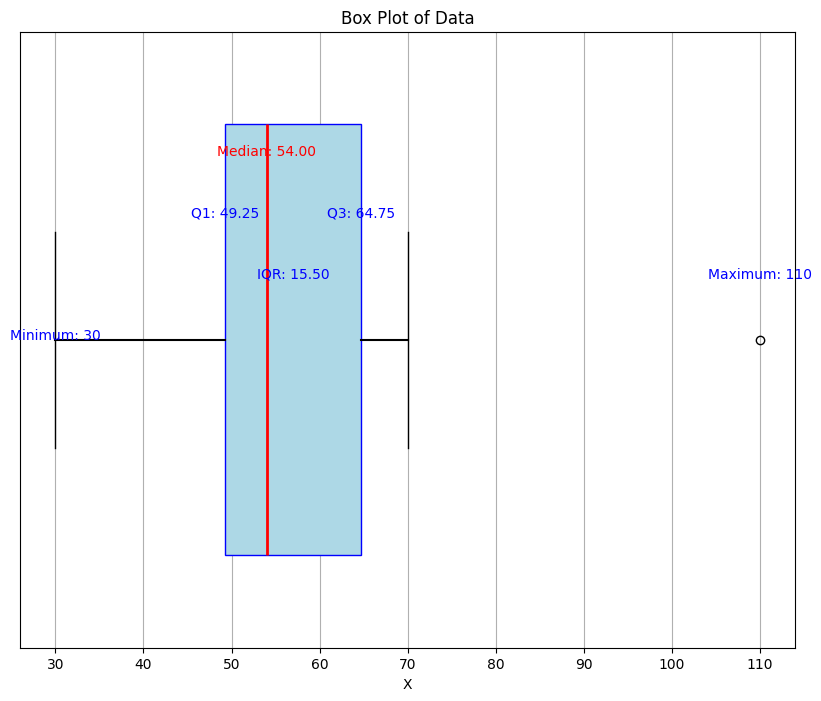

In [19]:
# Calculate quartiles and IQR
quartiles = data['X'].quantile([0.25, 0.5, 0.75])
Q1, median, Q3 = quartiles[0.25], quartiles[0.5], quartiles[0.75]
IQR = Q3 - Q1
minimum, maximum = data['X'].min(), data['X'].max()

# Create a box plot
plt.figure(figsize=(10, 8))
plt.boxplot(data['X'], vert=False, widths=0.7, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            whiskerprops=dict(color='black', linewidth=1.5),
            medianprops=dict(color='red', linewidth=2))
plt.title('Box Plot of Data')
plt.xlabel('X')
plt.yticks([])
plt.grid(True)

# Add annotations for quartiles, range, and IQR
plt.annotate(f'Minimum: {minimum}', xy=(minimum, 1), xytext=(minimum, 1.0), color='blue', fontsize=10, ha='center')
plt.annotate(f'Maximum: {maximum}', xy=(maximum, 1), xytext=(maximum, 1.1), color='blue', fontsize=10, ha='center')
plt.annotate(f'Q1: {Q1:.2f}', xy=(Q1, 1), xytext=(Q1, 1.2), color='blue', fontsize=10, ha='center')
plt.annotate(f'Median: {median:.2f}', xy=(median, 1), xytext=(median, 1.3), color='red', fontsize=10, ha='center')
plt.annotate(f'Q3: {Q3:.2f}', xy=(Q3, 1), xytext=(Q3, 1.2), color='blue', fontsize=10, ha='center')
plt.annotate(f'IQR: {IQR:.2f}', xy=((Q1 + Q3) / 2, 1), xytext=((Q1 + Q3) / 2, 1.1), color='blue', fontsize=10, ha='center')

plt.show()

### Variance and Standard deviation

In [20]:
def variance(X):
    mean = X.mean()
    n = len(X)
    var = np.sum((X - mean)**2) / (n - 1)  # sample variance
    return var

In [21]:
data.apply(variance)

X    413.636364
dtype: float64

In [22]:
def standard_deviation(X):
    mean = X.mean()
    n = len(X)
    var = np.sum((X - mean)**2) / (n - 1)  # sample variance
    return np.sqrt(var)

In [23]:
data.apply(standard_deviation)

X    20.338052
dtype: float64

In [24]:
data = pd.DataFrame({
    'unit_price':(40, 43, 47, 74, 75, 78, 115, 117, 120),
    'Count_of_items_sold':(275, 300, 250, 360, 515, 540, 320, 275, 350)
})
data.head()

,unit_price,Count_of_items_sold
0,40,275
1,43,300
2,47,250
3,74,360
4,75,515


In [25]:
q1 = data['Count_of_items_sold'].quantile(0.25)
median = data['Count_of_items_sold'].quantile(0.5)
q3 = data['Count_of_items_sold'].quantile(0.75)

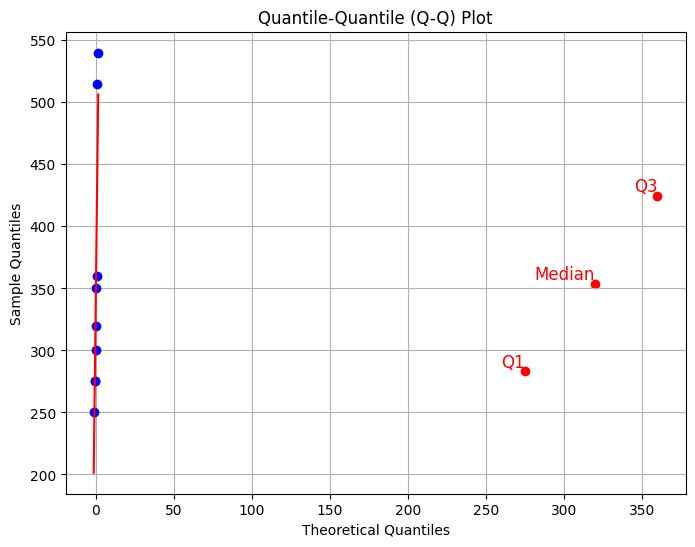

In [26]:
import scipy.stats as stats

# Create Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(data['Count_of_items_sold'], dist="norm", plot=plt)
plt.scatter([q1, median, q3], stats.norm.ppf([0.25, 0.5, 0.75], loc=data['Count_of_items_sold'].mean(), scale=data['Count_of_items_sold'].std()), color='r')
plt.text(q1, stats.norm.ppf(0.25, loc=data['Count_of_items_sold'].mean(), scale=data['Count_of_items_sold'].std()), 'Q1', verticalalignment='bottom', horizontalalignment='right', color='r', fontsize=12)
plt.text(median, stats.norm.ppf(0.5, loc=data['Count_of_items_sold'].mean(), scale=data['Count_of_items_sold'].std()), 'Median', verticalalignment='bottom', horizontalalignment='right', color='r', fontsize=12)
plt.text(q3, stats.norm.ppf(0.75, loc=data['Count_of_items_sold'].mean(), scale=data['Count_of_items_sold'].std()), 'Q3', verticalalignment='bottom', horizontalalignment='right', color='r', fontsize=12)
plt.title('Quantile-Quantile (Q-Q) Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

### Histograms

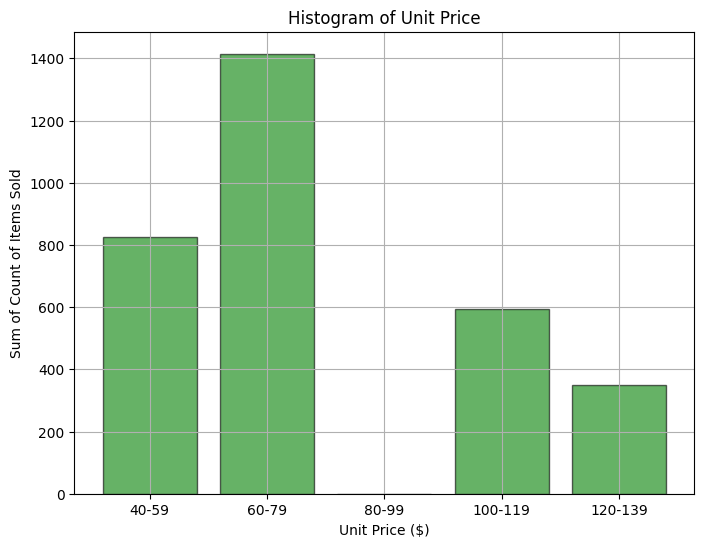

In [27]:
bins = [40, 60, 80, 100, 120, 140]
labels = ['40-59', '60-79', '80-99', '100-119', '120-139']

data['unit_price_bins'] = pd.cut(data['unit_price'], bins=bins, labels=labels, right=False)
counts = data.groupby('unit_price_bins', observed=False)['Count_of_items_sold'].sum().reset_index()

plt.figure(figsize=(8, 6))
plt.bar(counts['unit_price_bins'], counts['Count_of_items_sold'], color='g', alpha=0.6, edgecolor='black')
plt.title('Histogram of Unit Price')
plt.xlabel('Unit Price ($)')
plt.ylabel('Sum of Count of Items Sold')
plt.grid(True)
plt.show()

### Scatter Plots and Data Correlation

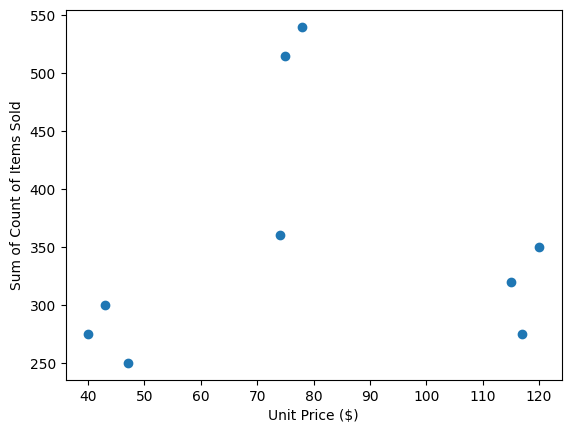

In [28]:
plt.scatter(data['unit_price'], data['Count_of_items_sold'])
plt.xlabel('Unit Price ($)')
plt.ylabel('Sum of Count of Items Sold')
plt.show()

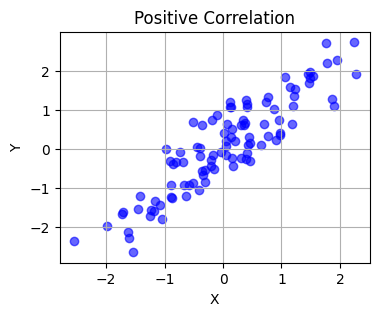

In [29]:
# Generate data for positive correlation
np.random.seed(0)
x_pos = np.random.normal(0, 1, 100)
y_pos = x_pos + np.random.normal(0, 0.5, 100)

# Plot
plt.figure(figsize=(4, 3))
plt.scatter(x_pos, y_pos, color='blue', alpha=0.6)
plt.title('Positive Correlation')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

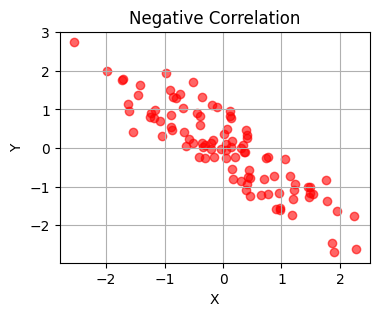

In [30]:
# Generate data for negative correlation
np.random.seed(0)
x_neg = np.random.normal(0, 1, 100)
y_neg = -x_neg + np.random.normal(0, 0.5, 100)

# Plot
plt.figure(figsize=(4, 3))
plt.scatter(x_neg, y_neg, color='red', alpha=0.6)
plt.title('Negative Correlation')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

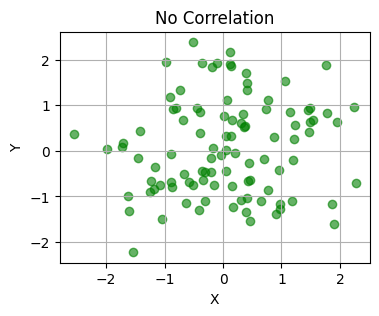

In [31]:
# Generate data for no correlation
np.random.seed(0)
x_no_corr = np.random.normal(0, 1, 100)
y_no_corr = np.random.normal(0, 1, 100)

# Plot
plt.figure(figsize=(4, 3))
plt.scatter(x_no_corr, y_no_corr, color='green', alpha=0.6)
plt.title('No Correlation')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

### Chi-square Calculation

In [32]:
data = {
    'Play chess': [250, 200],
    'Not play chess': [50, 1000]
}

data = pd.DataFrame(data, index=['Like science fiction', 'Not like science fiction'])
data

,Play chess,Not play chess
Like science fiction,250,50
Not like science fiction,200,1000


In [33]:
def chi2_square_test(df):
    row_sum = df.sum(axis=1)
    col_sum = df.sum(axis=0)
    total_sum = df.values.sum()

    expected = np.outer(row_sum, col_sum) / total_sum
    observed = df.values
    
    chi2 = np.sum((observed - expected)**2 / expected)
    deg_of_freedom = (df.shape[0] - 1) * (df.shape[1] - 1)

    p_value = 1 - stats.chi2.cdf(chi2, deg_of_freedom)
    return chi2, p_value

In [34]:
chi2_stat, p_val = chi2_square_test(data)

print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_val}")

Chi-square statistic: 507.93650793650795
P-value: 0.0


In [35]:
alpha = 0.05  # Significance level

if p_val < alpha:
    print("Reject null hypothesis: There is a relationship between playing chess and liking science fiction.")
else:
    print("Fail to reject null hypothesis: There is no relationship between playing chess and liking science fiction.")

Reject null hypothesis: There is a relationship between playing chess and liking science fiction.


### Covariance and Correlation Calculation

In [43]:
def covariance(X, Y):
    if len(X) != len(Y):
        raise ValueError("X and Y must have the same number of elements")
        
    X_mean = X.mean()
    Y_mean = Y.mean()
    
    cov = np.mean((X-X_mean) * (Y-Y_mean))
    return cov

In [44]:
data = pd.DataFrame({
    'X':[2,3,5,4,6],
    'Y':[5, 8, 10, 12, 14]
})
covariance(data['X'], data['Y'])

4.0

In [45]:
def correlation(X, Y):
    if len(X) != len(Y):
        raise ValueError("X and Y must have the same number of elements")

    cov = covariance(X, Y)
    std_X = np.std(X)
    std_Y = np.std(Y)

    corr = cov / (std_X * std_Y)
    return corr

In [46]:
correlation(data['X'], data['Y'])

0.9053574604251853

### Measuring Data Similarity and Dissimilarity